In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pandas_datareader import data
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import norm
import pyfolio as pf
%matplotlib inline

/Users/janviaswani/opt/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
import csv
df = pd.read_csv('Final_stock_data_V2.csv')
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
1,ABT,Abbott Laboratories,Healthcare,Increase,Above Fair Price,OverValued,Average,118.2900,0.181179,2.091710e+11,...,0.74,3.940,0.1318,22.924420,30.022842,51.234756,25.96,0.109154,0.249769,0.247649
2,ACN,Accenture plc,Technology,Increase,Above Fair Price,OverValued,Sustainable,323.9050,0.208836,2.047083e+11,...,1.21,9.613,0.1135,31.025385,33.694477,121.148794,9.45,0.166287,0.254874,0.245322
3,ADM,Archer-Daniels-Midland Company,Consumer Defensive,Increase,Above Fair Price,OverValued,Not Sustainable,76.9850,0.122815,4.327843e+10,...,0.81,4.790,0.0660,14.804809,16.072025,19.449588,36.42,0.117663,0.252289,0.150693
4,ADP,"Automatic Data Processing, Inc.",Industrials,Increase,Above Fair Price,OverValued,Sustainable,201.0100,0.182708,8.443324e+10,...,0.83,6.460,0.1371,26.483530,31.116098,90.801919,14.18,0.120094,0.272415,0.178939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
934,ZD,"Ziff Davis, Inc.",Communication Services,Increase,Above Fair Price,OverValued,No Data,102.4800,0.145864,4.941668e+09,...,1.01,4.120,0.1140,14.193907,24.873789,38.485339,999.00,0.141975,0.308007,0.055993
935,ZUMZ,Zumiez Inc.,Consumer Cyclical,Decrease,Above Fair Price,UnderValued,No Data,42.6600,0.035214,9.777245e+08,...,1.68,4.870,0.1500,9.233767,8.759754,21.330001,999.00,0.223419,0.513665,0.157523
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


<AxesSubplot:>

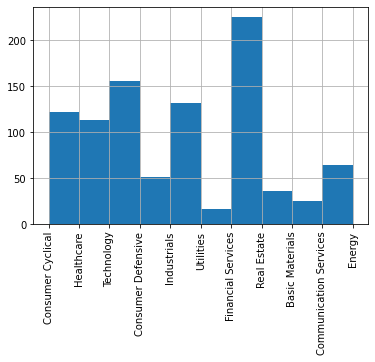

In [3]:
df['sector'].hist(xrot=90)

## Filter based on 2/3 criteria

In [4]:
def check_criteria(each):
    check = []
    if each["capm_status"] == "UnderValued":
        check.append(True)
    if each["Earnings_expectation"] == "Increase":
        check.append(True)
    if each["irv_status"] == "Below Fair Price":
        check.append(True)
    return check

In [5]:
def check_number(criteria):
    if len(criteria) >= 2:
        return True
    else:
        return False

In [6]:
rows = []
for i in range(938):
    each = df.iloc[i]
    criteria = check_criteria(each)
    result = check_number(criteria)
    if result:
        rows.append(i)

In [7]:
len(rows)

476

In [8]:
df = df.iloc[rows]
df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,109.188247,12.97,0.171149,0.355467,0.049267
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
14,AMD,"Advanced Micro Devices, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,117.1100,0.319034,1.414232e+11,...,1.95,3.242,0.3532,35.062874,36.122765,253.245268,999.00,0.256240,0.564107,0.569607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,XOMA,XOMA Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,20.7600,-0.034853,2.348205e+08,...,0.81,0.082,0.1900,-90.260870,253.170730,14.120154,999.00,0.117663,0.689078,0.371572
932,XP,XP Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,34.1100,-0.001020,1.908622e+10,...,1.91,0.986,0.0478,27.508064,34.594322,7.380346,999.00,0.251378,NaN,NaN
933,XRX,Xerox Holdings Corporation,Technology,Increase,Above Fair Price,UnderValued,No Data,20.6059,0.029031,3.678401e+09,...,1.75,1.459,-0.1600,10.302950,14.123303,0.609810,999.00,0.231929,0.405374,-0.032851
936,ESNT,Essent Group Ltd.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,44.4800,0.082041,4.912015e+09,...,1.33,5.569,0.1555,7.339934,7.987071,23.215807,999.00,0.180874,0.502764,0.045034


In [9]:
#total number of stocks for each sector 

df["sector"].value_counts()

Industrials               93
Technology                89
Consumer Cyclical         79
Financial Services        68
Healthcare                52
Communication Services    29
Basic Materials           20
Consumer Defensive        19
Energy                    15
Real Estate               11
Utilities                  1
Name: sector, dtype: int64

In [10]:
#df for each sector

df_BM = df.loc[df['sector'] == 'Basic Materials']
df_CS = df.loc[df['sector'] == 'Communication Services']
df_CC = df.loc[df['sector'] == 'Consumer Cyclical']
df_CD = df.loc[df['sector'] == 'Consumer Defensive']
df_energy = df.loc[df['sector'] == 'Energy']
df_FS = df.loc[df['sector'] == 'Financial Services']
df_healthcare = df.loc[df['sector'] == 'Healthcare']
df_industrials = df.loc[df['sector'] == 'Industrials']
df_RE = df.loc[df['sector'] == 'Real Estate']
df_tech = df.loc[df['sector'] == 'Technology']
df_utilities = df.loc[df['sector'] == 'Utilities']

## Helper Functions

In [11]:
def get_closeprice(ticker):    
    start_date = str(date.today().year - 5) +'-0'+ str(date.today().month) +'-'+ str(date.today().day)
    end_date = str(date.today())
    
    panel_data = data.DataReader([ticker],'yahoo', start_date, end_date)
    closes = panel_data[["Close", "Adj Close"]]
    
    return closes

In [12]:
def get_sharpe_ratio(ticker):
    
    closes = get_closeprice(ticker)
    adj_close = closes["Adj Close"]
    
    risk_free_ann_ret_rate = 0.0195  #assuming this rate based on the latest data
     
    #Rp
    returns_ts = adj_close.pct_change().dropna()
    
    #Average Rp
    avg_daily_ret = returns_ts.mean()

    #Average risk-free rate for the year (Annual rate / number of trading days to spread it out)
    returns_ts['RiskFree_Rate'] = risk_free_ann_ret_rate/252

    #Average Rf
    avg_rf_ret = returns_ts['RiskFree_Rate'].mean()

    #calculate sharpe ratio

    #Add the excess return columns for each ETF: Rp - Rf
    returns_ts['Excess_ret'] = returns_ts[ticker] - returns_ts['RiskFree_Rate']
    
    sharpe = ((avg_daily_ret[ticker] - avg_rf_ret) /returns_ts['Excess_ret'].std())*np.sqrt(252)

    return sharpe.round(3)

In [13]:
def get_return_series(ticker):
    closes = get_closeprice(ticker)
    return_series_close = (closes['Close'].pct_change()+ 1).cumprod() - 1
    return return_series_close

# Basic Materials

## Filtering stocks based on volatility

In [14]:
df_BM = df_BM[df_BM["AHV_5y"] < 0.5]

In [15]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.860,0.133471,1.555331e+10,...,1.27,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.770,0.111741,3.430530e+10,...,1.04,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.590,0.160340,3.347474e+10,...,1.47,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,1.44,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.960,0.140960,3.488845e+10,...,1.15,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.990,0.152557,4.533101e+09,...,0.62,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.450,0.143631,2.401889e+09,...,1.35,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989
634,MERC,Mercer International Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,13.540,0.080362,8.941491e+08,...,1.76,1.264,0.0573,6.478469,10.712025,3.177548,999.00,0.233144,0.432586,0.046865
690,NTIC,Northern Technologies Internati,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,13.280,0.062805,1.222218e+08,...,1.05,0.640,0.2000,11.547826,20.750000,9.739098,999.00,0.146837,0.481456,0.132094
722,PAAS,Pan American Silver Corp.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,23.490,0.007717,4.940252e+09,...,1.10,1.200,0.1714,10.628959,19.574999,13.864985,999.00,0.152915,0.491337,0.036807


## Filtering Stocks based on Sharpe Ratio

In [16]:
sharpe_list = []
for i in range(len(df_BM)):
    each = df_BM.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [17]:
sharpe_list

[0.461,
 0.13,
 0.458,
 0.724,
 0.289,
 0.457,
 0.405,
 0.344,
 0.41,
 0.418,
 0.693,
 0.509,
 0.678]

In [18]:
df_BM["sharpe"] = sharpe_list
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
42,CE,Celanese Corporation Celanese C,Basic Materials,Decrease,Below Fair Price,UnderValued,Not Sustainable,142.860,0.133471,1.555331e+10,...,24.792,0.2942,9.058972,5.762343,206.829589,30.53,0.173580,0.326016,0.120412,0.461
103,IFF,International Flavors & Fragran,Basic Materials,Increase,Above Fair Price,UnderValued,Average,134.770,0.111741,3.430530e+10,...,1.167,0.0449,25.476372,115.484146,28.441679,22.82,0.145622,0.293892,0.051737,0.130
129,LYB,LyondellBasell Industries NV,Basic Materials,Decrease,Below Fair Price,UnderValued,Average,100.590,0.160340,3.347474e+10,...,17.121,0.4701,6.613412,5.875241,458.528308,24.89,0.197892,0.398685,0.086687,0.458
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.724
170,PPG,"PPG Industries, Inc.",Basic Materials,Increase,Above Fair Price,UnderValued,Average,146.960,0.140960,3.488845e+10,...,5.951,0.1660,17.878345,24.695010,83.210006,24.51,0.158993,0.273559,0.082631,0.289
271,BCPC,Balchem Corporation,Basic Materials,Increase,Below Fair Price,OverValued,No Data,139.990,0.152557,4.533101e+09,...,2.860,0.2400,33.410503,48.947556,137.905521,999.00,0.094567,0.285427,0.108634,0.457
557,IOSP,Innospec Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,97.450,0.143631,2.401889e+09,...,3.688,0.0750,18.849129,26.423534,26.555069,999.00,0.183305,0.351408,0.076989,0.405
634,MERC,Mercer International Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,13.540,0.080362,8.941491e+08,...,1.264,0.0573,6.478469,10.712025,3.177548,999.00,0.233144,0.432586,0.046865,0.344
690,NTIC,Northern Technologies Internati,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,13.280,0.062805,1.222218e+08,...,0.640,0.2000,11.547826,20.750000,9.739098,999.00,0.146837,0.481456,0.132094,0.410
722,PAAS,Pan American Silver Corp.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,23.490,0.007717,4.940252e+09,...,1.200,0.1714,10.628959,19.574999,13.864985,999.00,0.152915,0.491337,0.036807,0.418


In [19]:
df_BM = df_BM[df_BM["sharpe"] > 0.5]
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.724
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.693
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.509
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.678


# Consumer Defensive

## Filtering stocks based on volatility

In [35]:
df_CD = df_CD[df_CD["AHV_5y"] < 0.5]

In [36]:
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,0.79,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,0.62,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,0.59,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.79,-0.035146,4.870455e+10,...,1.08,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.34,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,0.74,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.33,0.219583,3.950329e+09,...,0.96,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.00,0.058080,3.343734e+09,...,0.66,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.29,0.170795,3.457951e+09,...,0.46,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754
754,PRDO,Perdoceo Education Corporation,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,10.11,-0.012971,7.087666e+08,...,1.16,1.569,0.1500,5.877907,6.443594,5.055000,999.00,0.160209,0.393648,0.007507


## Filtering Stocks based on Sharpe Ratio

In [37]:
sharpe_list = []
for i in range(len(df_CD)):
    each = df_CD.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [38]:
sharpe_list

[0.021,
 0.122,
 0.043,
 -0.338,
 0.44,
 0.341,
 0.29,
 0.058,
 0.314,
 0.292,
 0.032,
 0.1,
 0.275]

In [39]:
df_CD["sharpe"] = sharpe_list
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
36,CAG,"ConAgra Brands, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,35.70,0.090652,1.712493e+10,...,2.481,0.0224,13.522727,14.389359,6.193629,32.92,0.115232,0.287178,0.000833,0.021
46,CL,Colgate-Palmolive Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,79.09,0.078620,6.666093e+10,...,3.140,0.0612,23.330381,25.187897,19.186076,22.12,0.094567,0.206239,0.051918,0.122
117,K,Kellogg Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Average,66.39,0.056187,2.264716e+10,...,3.668,0.0315,15.959135,18.099781,12.474271,26.78,0.090920,0.233473,0.006971,0.043
119,KHC,The Kraft Heinz Company,Consumer Defensive,Increase,Above Fair Price,UnderValued,Not Sustainable,39.79,-0.035146,4.870455e+10,...,1.858,-0.0244,15.071969,21.415500,4.528032,34.47,0.150484,0.322340,-0.118555,-0.338
191,SYY,Sysco Corporation,Consumer Defensive,Increase,Below Fair Price,UnderValued,Sustainable,84.05,0.143456,4.308874e+10,...,1.332,0.5309,19.964370,63.100600,551.757903,12.14,0.182089,0.361481,0.130098,0.440
306,CCEP,Coca-Cola Europacific Partners,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,54.09,0.128504,2.491753e+10,...,1.515,0.3135,20.258427,35.702972,89.469938,999.00,0.109154,0.295493,0.110419,0.341
438,FIZZ,National Beverage Corp.,Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,42.33,0.219583,3.950329e+09,...,1.800,0.2556,22.162306,23.516668,46.665884,999.00,0.135897,0.463844,0.137329,0.290
500,HAIN,"The Hain Celestial Group, Inc.",Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,36.00,0.058080,3.343734e+09,...,0.962,0.1300,19.459460,37.422035,15.370851,999.00,0.099429,0.344834,-0.020295,0.058
609,LOPE,"Grand Canyon Education, Inc.",Consumer Defensive,Increase,Below Fair Price,OverValued,No Data,86.29,0.170795,3.457951e+09,...,5.729,0.9000,13.588977,15.061965,3957.603724,999.00,0.075117,0.335656,0.079754,0.314
754,PRDO,Perdoceo Education Corporation,Consumer Defensive,Increase,Above Fair Price,UnderValued,No Data,10.11,-0.012971,7.087666e+08,...,1.569,0.1500,5.877907,6.443594,5.055000,999.00,0.160209,0.393648,0.007507,0.292


In [40]:
df_CD = df_CD[df_CD["sharpe"] > 0.5]
df_CD

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe


# Real Estate Sector

## Filtering stocks based on volatility

In [56]:
df_RE = df_RE[df_RE["AHV_5y"] < 0.5]

In [57]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,1.16,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,1.40,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,0.36,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,0.31,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,1.11,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,1.00,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,1.44,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521


## Filtering Stocks based on Sharpe Ratio

In [58]:
sharpe_list = []
for i in range(len(df_RE)):
    each = df_RE.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [59]:
sharpe_list

[0.17, 0.667, 0.567, 0.822, 0.35, 0.366, 0.446]

In [60]:
df_RE["sharpe"] = sharpe_list
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
35,BXP,"Boston Properties, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,121.005,0.052115,1.890183e+10,...,2.044,0.0700,39.673770,59.200100,31.618901,13.57,0.160209,0.318134,0.015426,0.170
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.530,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.020,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.567
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822
365,CTRE,"CareTrust REIT, Inc.",Real Estate,Increase,Above Fair Price,UnderValued,No Data,17.580,0.133822,1.705837e+09,...,0.777,0.1020,17.580000,22.625483,5.988839,999.00,0.154131,0.425892,0.077533,0.350
485,GOOD,Gladstone Commercial Corporatio,Real Estate,Increase,Above Fair Price,UnderValued,No Data,21.090,0.095257,7.859906e+08,...,0.029,0.0600,-2109.000000,727.241400,5.064293,999.00,0.140759,0.386789,0.084844,0.366
581,LAMR,Lamar Advertising Company,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,109.850,0.167806,1.112110e+10,...,3.689,0.0300,23.422174,29.777718,20.371571,16.28,0.194245,0.413550,0.128521,0.446


In [61]:
df_RE = df_RE[df_RE["sharpe"] > 0.5]
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.567
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822


# Financial Services

## Filtering stocks based on volatility

In [77]:
df_FS = df_FS[df_FS["AHV_5y"] < 0.5]

In [78]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,1.24,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,1.20,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,1.15,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,1.65,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,1.23,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.5900,0.109501,5.853632e+10,...,1.26,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.0500,0.129134,2.451438e+10,...,1.16,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.0100,0.099441,8.992805e+09,...,0.99,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.6800,0.134755,1.900015e+10,...,1.60,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.4100,0.161210,8.639205e+10,...,1.34,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015


## Filtering Stocks based on Sharpe Ratio

In [79]:
sharpe_list = []
for i in range(len(df_FS)):
    each = df_FS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [80]:
sharpe_list

[0.657,
 0.03,
 0.246,
 0.434,
 0.138,
 0.465,
 0.358,
 0.325,
 0.302,
 0.487,
 0.544,
 0.272,
 0.375,
 0.691,
 0.16,
 0.044,
 0.101,
 0.227,
 0.115,
 0.056,
 0.846,
 0.618,
 0.26,
 0.431,
 0.052,
 0.388,
 0.16,
 0.312,
 -0.478,
 0.156,
 0.147,
 0.325,
 0.29,
 0.06,
 0.163,
 0.013,
 0.24,
 0.261,
 0.38,
 0.302,
 0.485,
 0.238,
 0.534,
 0.348,
 0.356,
 0.296,
 0.199]

In [81]:
df_FS["sharpe"] = sharpe_list
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.1100,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
28,BEN,"Franklin Resources, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,29.9300,0.009948,1.501872e+10,...,3.570,0.0949,7.876316,8.383754,9.619805,19.51,0.165071,0.345803,-0.016066,0.030
31,BK,The Bank of New York Mellon Cor,Financial Services,Increase,Above Fair Price,UnderValued,Average,55.7400,0.123563,4.603126e+10,...,3.925,0.1356,12.196937,14.201275,24.881978,22.79,0.158993,0.298729,0.053724,0.246
51,COF,Capital One Financial Corporati,Financial Services,Decrease,Below Fair Price,UnderValued,Average,153.6800,0.140197,6.540959e+10,...,26.739,0.4520,7.958571,5.747410,626.622996,23.22,0.219773,0.398322,0.129511,0.434
111,IVZ,Invesco Ltd,Financial Services,Increase,Above Fair Price,UnderValued,Not Sustainable,22.0725,0.030092,1.017999e+10,...,2.530,0.2130,7.911291,8.724308,17.835618,20.28,0.168718,0.427328,-0.024774,0.138
136,MET,"MetLife, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,69.5900,0.109501,5.853632e+10,...,5.992,0.0835,9.665278,11.613817,20.356189,14.74,0.172365,0.338744,0.114839,0.465
156,NTRS,Northern Trust Corporation,Financial Services,Increase,Above Fair Price,UnderValued,Average,118.0500,0.129134,2.451438e+10,...,6.340,0.1866,15.553360,18.619873,78.251831,24.39,0.160209,0.317205,0.083843,0.358
162,PBCT,People's,Financial Services,Increase,Above Fair Price,UnderValued,Average,21.0100,0.099441,8.992805e+09,...,0.702,0.1074,19.275229,29.928774,7.479217,23.64,0.139544,0.359543,0.052798,0.325
165,PFG,Principal Financial Group Inc,Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,71.6800,0.134755,1.900015e+10,...,6.220,0.1647,10.240000,11.524116,40.180390,17.00,0.213695,0.368267,0.065865,0.302
169,PNC,"PNC Financial Services Group, I",Financial Services,Increase,Above Fair Price,UnderValued,Average,204.4100,0.161210,8.639205e+10,...,10.173,-0.0426,14.497163,20.093384,19.635067,22.64,0.182089,0.324564,0.131015,0.487


In [82]:
df_FS = df_FS[df_FS["sharpe"] > 0.5]
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.544
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.691
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.846
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.618
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.534


# Consumer Cyclical Sector

## Filtering stocks based on volatility

In [98]:
df_CC = df_CC[df_CC["AHV_5y"] < 0.5]

In [99]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,1.25,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.10,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,1.63,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,1.08,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,1.08,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618
93,HAS,"Hasbro, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,95.7150,0.136486,1.320360e+10,...,1.02,3.278,0.1770,17.857275,29.199205,5.897359e+01,10.44,0.143190,0.352387,0.050021
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,1.23,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851
123,LEN,Lennar Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,87.5507,0.152779,2.652742e+10,...,1.50,14.270,0.2370,5.131928,6.135297,8.438715e+01,24.53,0.201539,0.406603,0.153482
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.75,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,1.43,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855


## Filtering Stocks based on Sharpe Ratio

In [100]:
sharpe_list = []
for i in range(len(df_CC)):
    each = df_CC.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [101]:
sharpe_list

[0.345,
 0.465,
 0.63,
 0.438,
 0.401,
 0.101,
 0.711,
 0.424,
 0.479,
 0.504,
 0.319,
 0.249,
 0.174,
 0.118,
 0.866,
 0.902,
 0.406,
 0.15,
 0.53,
 0.302,
 0.784,
 0.717,
 0.357,
 -0.006,
 0.507,
 0.172,
 0.175,
 0.969,
 0.617,
 0.667,
 0.089,
 -0.008,
 0.661,
 0.391,
 0.456,
 0.477,
 0.096,
 0.507,
 0.234]

In [102]:
df_CC["sharpe"] = sharpe_list
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
0,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,214.1500,0.103398,1.308405e+10,...,9.550,0.1525,13.932986,22.424082,1.091882e+02,12.97,0.171149,0.355467,0.049267,0.345
21,APTV,Aptiv PLC,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,139.9800,0.197323,3.786655e+10,...,2.941,0.4626,30.364424,47.596054,6.093763e+02,13.49,0.274474,0.428095,0.175759,0.465
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
80,F,Ford Motor Company,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,17.4300,0.074129,6.965446e+10,...,0.713,0.7767,8.758794,24.446003,4.370325e+02,29.57,0.150484,0.375582,0.108521,0.438
91,GPC,Genuine Parts Company,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,124.8900,0.103717,1.778708e+10,...,5.609,0.0460,17.202478,22.266000,2.660739e+01,12.53,0.150484,0.294242,0.076618,0.401
93,HAS,"Hasbro, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,95.7150,0.136486,1.320360e+10,...,3.278,0.1770,17.857275,29.199205,5.897359e+01,10.44,0.143190,0.352387,0.050021,0.101
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.711
123,LEN,Lennar Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,87.5507,0.152779,2.652742e+10,...,14.270,0.2370,5.131928,6.135297,8.438715e+01,24.53,0.201539,0.406603,0.153482,0.424
130,MAR,Marriott International,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,172.6300,0.188316,5.622266e+10,...,1.428,2.3223,32.449250,120.889360,1.209916e+06,22.08,0.231929,0.372085,0.155653,0.479
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.504


In [103]:
df_CC = df_CC[df_CC["sharpe"] > 0.5]
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.711
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.504
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.866
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.902
369,CVCO,"Cavco Industries, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,272.2100,0.191405,2.498158e+09,...,11.794,0.3000,16.309765,23.080380,4.102832e+02,999.00,0.146837,0.477616,0.226451,0.530
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.784
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.717
529,HTHT,Huazhu Group Limited,Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,42.5900,0.284349,1.378430e+10,...,0.349,0.2928,40.561905,122.034386,6.106315e+01,999.00,0.203970,0.492247,0.245064,0.507
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.969


# Technology

## Filtering stocks based on volatility

In [119]:
df_tech = df_tech[df_tech["AHV_5y"] < 0.5]

In [120]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,1.43,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,1.24,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,1.13,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,1.43,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642
89,GLW,Corning Incorporated,Technology,Increase,Above Fair Price,UnderValued,Sustainable,41.4800,0.146336,3.539936e+10,...,1.08,1.004,0.2214,17.879310,41.314743,35.665593,19.42,0.150484,0.325524,0.114638
105,IPGP,IPG Photonics Corporation,Technology,Increase,Below Fair Price,UnderValued,Sustainable,136.3400,0.092942,7.268135e+09,...,1.34,4.869,0.3150,23.305983,28.001642,227.847617,11.92,0.182089,0.448059,0.031403
152,NLOK,NortonLifeLock Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,27.4300,0.145231,1.595754e+10,...,1.08,1.496,0.1270,13.923858,18.335562,11.434851,15.23,0.150484,0.429618,0.123217
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,1.21,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,0.81,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,1.28,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735


## Filtering Stocks based on Sharpe Ratio

In [121]:
sharpe_list = []
for i in range(len(df_tech)):
    each = df_tech.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [122]:
sharpe_list

[0.609,
 0.771,
 0.42,
 0.799,
 0.388,
 0.172,
 0.432,
 0.603,
 0.561,
 0.534,
 0.742,
 0.476,
 0.07,
 0.195,
 1.056,
 0.816,
 0.141,
 0.139,
 0.476,
 0.286,
 0.374,
 0.288,
 -0.258,
 0.439,
 0.819,
 0.894,
 0.375,
 0.396,
 0.687,
 0.657,
 0.536,
 0.566,
 0.309,
 0.655,
 0.044,
 0.044,
 0.093,
 0.204,
 0.286,
 0.401,
 0.334,
 0.72,
 0.427,
 0.586,
 0.637,
 0.173,
 0.119,
 0.504,
 0.51,
 -0.102,
 0.045,
 0.695,
 0.081]

In [123]:
df_tech["sharpe"] = sharpe_list
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.609
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.771
57,CTSH,Cognizant Technology Solutions,Technology,Increase,Above Fair Price,UnderValued,Sustainable,85.7600,0.098598,4.556764e+10,...,3.545,0.1398,18.973452,24.191820,39.576018,17.47,0.156562,0.290279,0.115536,0.420
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.799
89,GLW,Corning Incorporated,Technology,Increase,Above Fair Price,UnderValued,Sustainable,41.4800,0.146336,3.539936e+10,...,1.004,0.2214,17.879310,41.314743,35.665593,19.42,0.150484,0.325524,0.114638,0.388
105,IPGP,IPG Photonics Corporation,Technology,Increase,Below Fair Price,UnderValued,Sustainable,136.3400,0.092942,7.268135e+09,...,4.869,0.3150,23.305983,28.001642,227.847617,11.92,0.182089,0.448059,0.031403,0.172
152,NLOK,NortonLifeLock Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,27.4300,0.145231,1.595754e+10,...,1.496,0.1270,13.923858,18.335562,11.434851,15.23,0.150484,0.429618,0.123217,0.432
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.603
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.561
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.534


In [124]:
df_tech = df_tech[df_tech["sharpe"] > 0.5]
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.609
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.771
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.799
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.603
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.561
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.534
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.742
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.056
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.816
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.819


# Industrials

## Filtering stocks based on volatility

In [140]:
df_industrials = df_industrials[df_industrials["AHV_5y"] < 0.5]

In [141]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,1.55,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,1.14,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,1.31,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,0.90,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,0.76,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.0300,0.056277,1.372706e+09,...,0.69,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926
903,ULBI,Ultralife Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,4.6500,-0.009776,7.477526e+07,...,1.53,0.188,0.1750,12.567568,24.734043,2.821520,999.00,0.205186,0.489145,-0.016927
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,1.48,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,1.48,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138


## Filtering Stocks based on Sharpe Ratio

In [142]:
sharpe_list = []
for i in range(len(df_industrials)):
    each = df_industrials.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [143]:
sharpe_list

[-0.015,
 0.396,
 0.763,
 0.736,
 0.375,
 0.4,
 0.488,
 0.255,
 0.339,
 0.619,
 0.333,
 0.751,
 0.491,
 0.73,
 -0.026,
 1.24,
 0.53,
 0.405,
 0.313,
 0.669,
 0.504,
 0.253,
 0.21,
 0.037,
 0.393,
 0.469,
 0.175,
 -0.331,
 0.556,
 0.332,
 0.3,
 0.612,
 -0.002,
 0.751,
 0.215,
 0.683,
 -0.174,
 0.446,
 0.183,
 0.352,
 0.406,
 0.453,
 0.554,
 -0.169,
 0.739,
 0.26,
 0.419,
 0.557,
 0.604,
 0.407,
 0.239,
 0.678,
 0.239,
 0.212,
 0.521,
 1.076,
 0.121,
 -0.093,
 1.017,
 0.375,
 0.205,
 0.44,
 0.294,
 0.484]

In [144]:
df_industrials["sharpe"] = sharpe_list
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
11,ALK,"Alaska Air Group, Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,58.9750,0.141697,7.425660e+09,...,3.770,-0.2340,9.073076,15.643236,0.761055,999.00,0.207617,0.454054,-0.086043,-0.015
12,ALLE,Allegion plc,Industrials,Increase,Above Fair Price,UnderValued,Average,114.1447,0.097180,1.023831e+10,...,5.086,0.0777,19.955368,22.442923,31.814578,23.59,0.157777,0.279213,0.118004,0.396
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.2800,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.1600,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
45,CHRW,"C.H. Robinson Worldwide, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,92.0950,0.055239,1.197115e+10,...,5.646,0.1239,15.222314,16.311548,37.451959,19.83,0.111585,0.262005,0.071573,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,TRS,TriMas Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,32.0300,0.056277,1.372706e+09,...,1.581,0.0934,13.020325,20.259329,10.168526,999.00,0.103076,0.319927,0.074926,0.375
903,ULBI,Ultralife Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,4.6500,-0.009776,7.477526e+07,...,0.188,0.1750,12.567568,24.734043,2.821520,999.00,0.205186,0.489145,-0.016927,0.205
904,ULH,"Universal Logistics Holdings, I",Industrials,Increase,Above Fair Price,UnderValued,No Data,18.0900,0.030170,4.869738e+08,...,2.740,0.0300,5.566154,6.602190,3.354772,999.00,0.199108,0.403463,0.069257,0.440
920,VSEC,VSE Corporation,Industrials,Increase,Above Fair Price,UnderValued,No Data,47.3300,0.148449,6.016543e+08,...,0.633,0.1960,12.198454,74.770935,33.682675,999.00,0.199108,0.472182,0.061138,0.294


In [145]:
df_industrials = df_industrials[df_industrials["sharpe"] > 0.5]
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.619
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.751
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.730
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.240
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.530
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.820,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.669
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.504
428,FELE,"Franklin Electric Co., Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,83.290,0.132326,3.867213e+09,...,2.970,0.1340,25.087350,28.043772,36.711304,999.00,0.139544,0.338616,0.165625,0.556


# Healthcare

## Filtering stocks based on volatility

In [161]:
df_healthcare = df_healthcare[df_healthcare["AHV_5y"] < 0.5]

In [162]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.000,0.060577,3.084753e+10,...,0.44,10.2170,-0.0650,11.332973,20.553978,16.300961,20.62,0.072686,0.458651,-0.051561
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,1.34,3.1770,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,0.94,8.7180,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,1.40,3.9290,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.180,0.056427,3.989698e+10,...,0.55,2.9330,0.0293,9.054902,15.744970,8.511794,18.38,0.086058,0.316630,-0.084159
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.180,0.044138,1.206273e+10,...,0.91,1.9020,0.2497,17.297806,29.011568,58.307321,20.12,0.129819,0.322027,0.004033
281,BMRN,BioMarin Pharmaceutical Inc.,Healthcare,Increase,Below Fair Price,OverValued,Average,86.365,0.093654,1.585601e+10,...,0.49,0.0360,0.3216,183.755310,2399.027800,150.982806,25.85,0.078764,0.389425,-0.027253
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.23,1.7710,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053
345,CPSI,"Computer Programs and Systems,",Healthcare,Increase,Above Fair Price,UnderValued,No Data,29.830,-0.042905,4.369618e+08,...,0.72,1.1010,0.1278,11.256603,27.093552,12.515019,999.00,0.106723,0.387793,0.077568
414,EXEL,"Exelixis, Inc.",Healthcare,Increase,Below Fair Price,OverValued,No Data,19.600,0.130273,6.201381e+09,...,0.88,0.5100,0.4600,25.789474,38.431374,83.969435,999.00,0.126172,0.481829,-0.001584


## Filtering Stocks based on Sharpe Ratio

In [163]:
sharpe_list = []
for i in range(len(df_healthcare)):
    each = df_healthcare.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [164]:
sharpe_list

[0.078,
 0.873,
 0.905,
 0.787,
 -0.177,
 -0.021,
 0.104,
 0.74,
 0.289,
 0.21,
 0.43,
 0.336,
 0.073,
 0.345,
 0.82,
 0.126,
 0.074,
 0.948,
 0.637,
 0.055,
 0.392,
 0.07,
 0.205,
 0.944,
 0.566,
 0.325,
 0.435,
 0.447]

In [165]:
df_healthcare["sharpe"] = sharpe_list
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
30,BIIB,Biogen Inc.,Healthcare,Increase,Above Fair Price,UnderValued,Not Sustainable,210.000,0.060577,3.084753e+10,...,10.2170,-0.0650,11.332973,20.553978,16.300961,20.62,0.072686,0.458651,-0.051561,0.078
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.1770,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.7180,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.9290,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.787
212,WBA,"Walgreens Boots Alliance, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,46.180,0.056427,3.989698e+10,...,2.9330,0.0293,9.054902,15.744970,8.511794,18.38,0.086058,0.316630,-0.084159,-0.177
218,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.180,0.044138,1.206273e+10,...,1.9020,0.2497,17.297806,29.011568,58.307321,20.12,0.129819,0.322027,0.004033,-0.021
281,BMRN,BioMarin Pharmaceutical Inc.,Healthcare,Increase,Below Fair Price,OverValued,Average,86.365,0.093654,1.585601e+10,...,0.0360,0.3216,183.755310,2399.027800,150.982806,25.85,0.078764,0.389425,-0.027253,0.104
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.7710,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.740
345,CPSI,"Computer Programs and Systems,",Healthcare,Increase,Above Fair Price,UnderValued,No Data,29.830,-0.042905,4.369618e+08,...,1.1010,0.1278,11.256603,27.093552,12.515019,999.00,0.106723,0.387793,0.077568,0.289
414,EXEL,"Exelixis, Inc.",Healthcare,Increase,Below Fair Price,OverValued,No Data,19.600,0.130273,6.201381e+09,...,0.5100,0.4600,25.789474,38.431374,83.969435,999.00,0.126172,0.481829,-0.001584,0.210


In [166]:
df_healthcare = df_healthcare[df_healthcare["sharpe"] > 0.5]
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.787
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.740
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.820
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,65.803305,999.00,0.179658,0.498130,0.345048,0.948
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.637
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.460,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,246.376038,999.00,0.117663,0.415307,0.448328,0.944
821,SIGA,SIGA Technologies Inc.,Healthcare,Increase,Above Fair Price,UnderValued,No Data,6.170,0.068276,4.572976e+08,...,0.212,0.0100,7.712500,29.103775,0.959107,999.00,0.070255,0.443060,0.152124,0.566


# Communication Services

## Filtering stocks based on volatility

In [182]:
df_CS = df_CS[df_CS["AHV_5y"] < 0.5]

In [183]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
67,DISCA,"Discovery, Inc. - Series A",Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,29.660,0.027716,1.475057e+10,...,1.31,1.495,0.0354,9.268750,19.839464,5.765461,17.36,0.178443,0.436299,-0.002576
71,EA,Electronic Arts Inc.,Communication Services,Increase,Below Fair Price,OverValued,Sustainable,128.540,0.223319,3.635214e+10,...,0.87,2.715,0.2701,17.070383,47.344383,157.133571,10.36,0.124956,0.314375,0.095045
236,AMCX,AMC Networks Inc.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,38.505,-0.015313,1.626921e+09,...,1.10,7.502,-0.1220,4.730344,5.132631,1.696904,999.00,0.152915,0.481496,-0.061080
276,BIDU,"Baidu, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,Average,152.995,0.014219,5.402162e+10,...,0.94,6.069,0.0169,17.113535,25.209260,25.285463,24.22,0.133466,0.420337,-0.029105
307,CCOI,"Cogent Communications Holdings,",Communication Services,Increase,Below Fair Price,OverValued,No Data,62.500,0.173571,2.979612e+09,...,0.15,0.481,1.0069,57.339447,129.937620,4691.384428,999.00,0.037434,0.321307,0.117506
465,FWONA,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,56.620,0.108724,1.382502e+10,...,1.23,0.004,-0.6850,471.833340,14154.999000,0.000246,999.00,0.168718,0.363516,0.136089
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.870,0.096506,1.418951e+10,...,1.23,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119
544,IDCC,"InterDigital, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,64.290,0.068054,1.972289e+09,...,1.02,1.023,0.1500,23.988806,62.844574,32.145000,999.00,0.143190,0.350767,-0.056945
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.160,0.123105,2.556808e+10,...,0.97,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367
600,LILAK,Liberty Latin America Ltd.,Communication Services,Decrease,Below Fair Price,UnderValued,No Data,10.930,-0.111830,2.541531e+09,...,1.40,0.606,2.1700,18.844830,18.036304,50216.099014,999.00,0.189383,0.452165,-0.136310


## Filtering Stocks based on Sharpe Ratio

In [184]:
sharpe_list = []
for i in range(len(df_CS)):
    each = df_CS.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [185]:
sharpe_list

[0.169,
 0.314,
 0.068,
 0.137,
 0.448,
 0.483,
 0.5,
 0.014,
 0.406,
 -0.153,
 0.1,
 0.271,
 1.159,
 -0.28]

In [186]:
df_CS["sharpe"] = sharpe_list
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
67,DISCA,"Discovery, Inc. - Series A",Communication Services,Increase,Above Fair Price,UnderValued,Sustainable,29.660,0.027716,1.475057e+10,...,1.495,0.0354,9.268750,19.839464,5.765461,17.36,0.178443,0.436299,-0.002576,0.169
71,EA,Electronic Arts Inc.,Communication Services,Increase,Below Fair Price,OverValued,Sustainable,128.540,0.223319,3.635214e+10,...,2.715,0.2701,17.070383,47.344383,157.133571,10.36,0.124956,0.314375,0.095045,0.314
236,AMCX,AMC Networks Inc.,Communication Services,Increase,Above Fair Price,UnderValued,No Data,38.505,-0.015313,1.626921e+09,...,7.502,-0.1220,4.730344,5.132631,1.696904,999.00,0.152915,0.481496,-0.061080,0.068
276,BIDU,"Baidu, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,Average,152.995,0.014219,5.402162e+10,...,6.069,0.0169,17.113535,25.209260,25.285463,24.22,0.133466,0.420337,-0.029105,0.137
307,CCOI,"Cogent Communications Holdings,",Communication Services,Increase,Below Fair Price,OverValued,No Data,62.500,0.173571,2.979612e+09,...,0.481,1.0069,57.339447,129.937620,4691.384428,999.00,0.037434,0.321307,0.117506,0.448
465,FWONA,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,56.620,0.108724,1.382502e+10,...,0.004,-0.6850,471.833340,14154.999000,0.000246,999.00,0.168718,0.363516,0.136089,0.483
466,FWONK,Liberty Media Corporation - Ser,Communication Services,Increase,Above Fair Price,UnderValued,No Data,61.870,0.096506,1.418951e+10,...,0.004,-0.6850,515.583300,15467.499000,0.000269,999.00,0.168718,0.371499,0.156119,0.500
544,IDCC,"InterDigital, Inc.",Communication Services,Increase,Above Fair Price,UnderValued,No Data,64.290,0.068054,1.972289e+09,...,1.023,0.1500,23.988806,62.844574,32.145000,999.00,0.143190,0.350767,-0.056945,0.014
588,LBRDA,Liberty Broadband Corporation,Communication Services,Increase,Below Fair Price,UnderValued,No Data,144.160,0.123105,2.556808e+10,...,3.234,0.6382,29.480574,44.576378,1741.151369,999.00,0.137112,0.276357,0.108367,0.406
600,LILAK,Liberty Latin America Ltd.,Communication Services,Decrease,Below Fair Price,UnderValued,No Data,10.930,-0.111830,2.541531e+09,...,0.606,2.1700,18.844830,18.036304,50216.099014,999.00,0.189383,0.452165,-0.136310,-0.153


In [187]:
df_CS = df_CS[df_CS["sharpe"] > 0.5]
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.2,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.4755,199.319788,999.0,0.127388,0.45571,0.540216,1.159


# Energy

## Filtering stocks based on volatility

In [203]:
df_energy = df_energy[df_energy["AHV_5y"] < 0.5]

In [204]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
32,BKR,Baker Hughes Company,Energy,Increase,Below Fair Price,UnderValued,No Data,29.185,-0.001522,2.539002e+10,...,1.62,0.180,3.4810,24.119833,162.138890,3.021507e+06,999.00,0.216126,0.473062,-0.050113
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,1.62,3.687,-0.0180,11.444871,24.212095,1.077453e+01,34.87,0.216126,0.420681,0.148794
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,1.27,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378
145,MPC,Marathon Petroleum Corporation,Energy,Decrease,Below Fair Price,UnderValued,Average,75.660,0.168450,4.657539e+10,...,2.08,14.246,0.4380,17.928911,5.310965,2.827390e+02,28.78,0.272043,0.462210,0.134486
159,OKE,"ONEOK, Inc.",Energy,Increase,Above Fair Price,UnderValued,Average,60.580,0.112232,2.701486e+10,...,1.77,3.195,0.0986,15.858640,18.960876,2.007128e+01,24.08,0.234360,0.494682,0.088954
175,PXD,Pioneer Natural Resources Compa,Energy,Increase,Below Fair Price,UnderValued,Not Sustainable,223.510,0.077453,5.456639e+10,...,1.84,6.280,0.7775,11.203508,35.590763,5.626948e+03,36.08,0.242869,0.477352,0.058166


## Filtering Stocks based on Sharpe Ratio

In [205]:
sharpe_list = []
for i in range(len(df_energy)):
    each = df_energy.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [206]:
sharpe_list

[0.211, 0.639, 0.502, 0.494, 0.472, 0.38]

In [207]:
df_energy["sharpe"] = sharpe_list
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
32,BKR,Baker Hughes Company,Energy,Increase,Below Fair Price,UnderValued,No Data,29.185,-0.001522,2.539002e+10,...,0.180,3.4810,24.119833,162.138890,3.021507e+06,999.00,0.216126,0.473062,-0.050113,0.211
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,1.077453e+01,34.87,0.216126,0.420681,0.148794,0.639
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,1.215112e+01,43.22,0.173580,0.334478,0.084378,0.502
145,MPC,Marathon Petroleum Corporation,Energy,Decrease,Below Fair Price,UnderValued,Average,75.660,0.168450,4.657539e+10,...,14.246,0.4380,17.928911,5.310965,2.827390e+02,28.78,0.272043,0.462210,0.134486,0.494
159,OKE,"ONEOK, Inc.",Energy,Increase,Above Fair Price,UnderValued,Average,60.580,0.112232,2.701486e+10,...,3.195,0.0986,15.858640,18.960876,2.007128e+01,24.08,0.234360,0.494682,0.088954,0.472
175,PXD,Pioneer Natural Resources Compa,Energy,Increase,Below Fair Price,UnderValued,Not Sustainable,223.510,0.077453,5.456639e+10,...,6.280,0.7775,11.203508,35.590763,5.626948e+03,36.08,0.242869,0.477352,0.058166,0.380


In [208]:
df_energy = df_energy[df_energy["sharpe"] > 0.5]
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.639
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.502


# Utilities

## Filtering stocks based on volatility

In [224]:
df_utilities = df_utilities[df_utilities["AHV_5y"] < 0.5]

In [225]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,beta,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,0.61,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782


## Filtering Stocks based on Sharpe Ratio

In [226]:
sharpe_list = []
for i in range(len(df_utilities)):
    each = df_utilities.iloc[i]
    ticker = each["ticker"]
    sharpe = get_sharpe_ratio(ticker)
    sharpe_list.append(sharpe)

In [227]:
sharpe_list

[0.502]

In [228]:
df_utilities["sharpe"] = sharpe_list
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.502


In [229]:
df_utilities = df_utilities[df_utilities["sharpe"] > 0.5]
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.502


# Putting everything into 1 DF

In [287]:
df_BM

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.724
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.693
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.509
855,STLD,"Steel Dynamics, Inc.",Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,63.230,0.186302,1.254806e+10,...,11.005,0.3632,5.062450,5.745570,146.099525,34.29,0.202754,0.411506,0.159118,0.678


In [256]:
# chosen_CD_df

In [288]:
df_RE

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
39,CBRE,CBRE Group Inc,Real Estate,Increase,Above Fair Price,UnderValued,Sustainable,99.53,0.182808,3.330930e+10,...,4.290,0.1100,17.647163,23.200466,36.186806,6.99,0.189383,0.351216,0.244065,0.667
74,EQIX,"Equinix, Inc.",Real Estate,Increase,Below Fair Price,OverValued,Sustainable,681.02,0.198920,6.131986e+10,...,4.743,0.3700,88.100910,143.584230,1645.638404,14.71,0.062961,0.272286,0.148163,0.567
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.16,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822


In [289]:
df_FS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
26,AXP,American Express Company,Financial Services,Increase,Below Fair Price,UnderValued,Not Sustainable,195.11,0.155990,1.511236e+11,...,9.573,0.4330,20.176836,20.381280,706.617956,20.34,0.169933,0.343000,0.210121,0.657
185,SBNY,Signature Bank,Financial Services,Increase,Above Fair Price,UnderValued,Average,337.79,0.196788,2.048102e+10,...,13.954,0.0632,19.570684,24.207396,83.343349,28.14,0.248947,0.404451,0.169671,0.544
197,TROW,"T. Rowe Price Group, Inc.",Financial Services,Increase,Above Fair Price,UnderValued,Sustainable,142.56,0.120724,3.267447e+10,...,13.270,0.1220,10.678651,10.743029,57.098253,16.74,0.167502,0.300412,0.193441,0.691
317,CG,The Carlyle Group Inc.,Financial Services,Decrease,Below Fair Price,UnderValued,No Data,44.83,0.139004,1.598019e+10,...,7.730,0.2826,11.041873,5.799483,59.852092,999.00,0.193030,0.363420,0.276296,0.846
360,CSWC,Capital Southwest Corporation,Financial Services,Increase,Above Fair Price,UnderValued,No Data,24.42,0.082236,5.699872e+08,...,1.740,0.0100,12.652850,14.034483,3.796011,999.00,0.174796,0.330948,0.198592,0.618
838,SNEX,StoneX Group Inc.,Financial Services,Increase,Above Fair Price,UnderValued,No Data,77.30,0.125325,1.541957e+09,...,5.740,0.1900,10.980114,13.466900,52.576494,999.00,0.165071,0.381421,0.155673,0.534


In [290]:
df_CC

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
65,DHI,"D.R. Horton, Inc.",Consumer Cyclical,Increase,Above Fair Price,UnderValued,Average,81.3366,0.204622,2.897055e+10,...,11.410,0.1060,5.326562,7.128537,2.862672e+01,22.55,0.217341,0.370627,0.238886,0.630
98,HLT,Hilton Worldwide Holdings Inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,147.9550,0.134492,4.123831e+10,...,0.140,2.7265,34.408140,1056.821400,2.914266e+06,19.95,0.168718,0.314619,0.209851,0.711
166,PHM,"PulteGroup, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,Average,46.5600,0.196675,1.178834e+10,...,6.465,0.2370,5.088525,7.201856,4.487761e+01,21.06,0.193030,0.391428,0.183855,0.504
321,CHDN,"Churchill Downs, Incorporated",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,214.5100,0.285760,8.204814e+09,...,5.574,2.0990,23.598460,38.484030,8.037688e+05,999.00,0.165071,0.428761,0.357716,0.866
326,CLAR,Clarus Corporation,Consumer Cyclical,Increase,Below Fair Price,UnderValued,No Data,21.4100,0.104810,7.919045e+08,...,0.554,0.3290,13.993464,38.646206,3.935781e+01,999.00,0.122525,0.393534,0.306635,0.902
369,CVCO,"Cavco Industries, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,272.2100,0.191405,2.498158e+09,...,11.794,0.3000,16.309765,23.080380,4.102832e+02,999.00,0.146837,0.477616,0.226451,0.530
437,FIVE,"Five Below, Inc.",Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,159.6400,0.196712,8.943895e+09,...,4.662,0.4612,27.242321,34.242813,6.889982e+02,999.00,0.178443,0.452922,0.332526,0.784
452,FOXF,Fox Factory Holding Corp.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,No Data,120.9000,0.205780,5.090374e+09,...,3.731,0.1500,23.613281,32.404182,6.045000e+01,999.00,0.230713,0.462622,0.367678,0.717
529,HTHT,Huazhu Group Limited,Consumer Cyclical,Increase,Below Fair Price,OverValued,No Data,42.5900,0.284349,1.378430e+10,...,0.349,0.2928,40.561905,122.034386,6.106315e+01,999.00,0.203970,0.492247,0.245064,0.507
616,LULU,lululemon athletica inc.,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Sustainable,304.5800,0.164012,3.938189e+10,...,6.661,0.2790,32.927567,45.725870,3.964841e+02,16.06,0.179658,0.392863,0.361296,0.969


In [291]:
df_tech

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
5,ADSK,"Autodesk, Inc.",Technology,Increase,Below Fair Price,UnderValued,Sustainable,217.3800,0.190997,4.781773e+10,...,5.928,0.2883,31.967648,36.670040,302.038344,15.45,0.193030,0.384894,0.209161,0.609
17,ANSS,"ANSYS, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,305.4575,0.163292,2.665208e+10,...,5.318,0.1118,38.470715,57.438416,112.688671,13.16,0.169933,0.316793,0.271663,0.771
73,EPAM,"EPAM Systems, Inc.",Technology,Increase,Below Fair Price,OverValued,No Data,428.8350,0.408649,2.432335e+10,...,7.211,0.2850,38.391674,59.469560,582.247739,999.00,0.193030,0.376405,0.422642,0.799
155,NTAP,"NetApp, Inc.",Technology,Increase,Above Fair Price,UnderValued,Sustainable,88.2150,0.095312,1.960825e+10,...,4.113,0.0880,16.009981,21.447847,26.785016,16.58,0.166287,0.373202,0.185306,0.603
161,ORCL,Oracle Corporation,Technology,Increase,Above Fair Price,UnderValued,Sustainable,74.2600,0.115413,1.983076e+11,...,3.543,0.0964,14.117870,20.959639,24.163822,14.47,0.117663,0.276972,0.149510,0.561
172,PTC,PTC Inc.,Technology,Increase,Above Fair Price,UnderValued,Sustainable,106.8900,0.149054,1.259934e+10,...,4.030,0.1645,21.124506,26.523571,59.824891,19.62,0.174796,0.362614,0.152735,0.534
176,QCOM,QUALCOMM Incorporated,Technology,Increase,Below Fair Price,UnderValued,Sustainable,165.6500,0.130769,1.855280e+11,...,7.870,0.2562,14.231099,21.048285,183.404501,18.00,0.173580,0.375961,0.297623,0.742
249,ASML,ASML Holding N.V. - New York Re,Technology,Increase,Below Fair Price,OverValued,No Data,634.7900,0.341963,2.580256e+11,...,15.017,0.2980,32.420326,42.271423,943.608234,999.00,0.134681,0.360669,0.411064,1.056
258,AUDC,AudioCodes Ltd.,Technology,Increase,Below Fair Price,OverValued,No Data,27.6750,0.234188,9.141052e+08,...,1.028,0.2500,16.875000,26.921206,29.306718,999.00,0.084842,0.446357,0.362672,0.816
381,DIOD,Diodes Incorporated,Technology,Increase,Above Fair Price,UnderValued,No Data,87.1300,0.131229,3.922401e+09,...,4.123,0.1500,14.919519,21.132670,43.564999,999.00,0.148053,0.401822,0.286506,0.819


In [292]:
df_industrials

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
15,AME,"AMETEK, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Average,128.280,0.155568,2.967437e+10,...,3.990,-0.0120,23.799630,32.150375,16.355389,25.95,0.178443,0.269622,0.206944,0.763
37,CAT,"Caterpillar, Inc.",Industrials,Increase,Below Fair Price,UnderValued,Not Sustainable,193.160,0.084214,1.044884e+11,...,9.348,0.3224,17.721102,20.663244,339.525357,34.28,0.128603,0.314958,0.175801,0.736
92,GWW,"W.W. Grainger, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,474.320,0.106272,2.443697e+10,...,17.495,0.1538,20.304794,27.111746,244.306874,14.60,0.169933,0.317545,0.154030,0.619
112,J,Jacobs Engineering Group Inc.,Industrials,Increase,Above Fair Price,UnderValued,Average,120.310,0.101926,1.557449e+10,...,3.196,0.1303,14.636252,37.643930,51.491402,25.36,0.118879,0.291333,0.161099,0.751
125,LHX,"L3Harris Technologies, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,220.650,0.203961,4.329704e+10,...,7.514,0.4180,16.129385,29.365185,726.908004,999.00,0.124956,0.273401,0.190286,0.730
158,ODFL,"Old Dominion Freight Line, Inc.",Industrials,Increase,Below Fair Price,OverValued,No Data,287.860,0.310243,3.310706e+10,...,8.087,0.2929,27.974731,35.595398,413.004855,999.00,0.143190,0.298006,0.382658,1.240
180,ROK,"Rockwell Automation, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,261.400,0.147389,3.032580e+10,...,11.580,0.1241,21.947943,22.573402,106.473014,19.68,0.185736,0.309476,0.144734,0.530
207,URI,"United Rentals, Inc.",Industrials,Increase,Above Fair Price,UnderValued,Sustainable,311.820,0.221984,2.257402e+10,...,16.534,0.2123,12.180469,18.859320,250.659605,18.26,0.251378,0.445386,0.191018,0.669
219,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,89.845,0.140404,1.620130e+10,...,2.549,0.1876,29.948334,35.247154,60.008813,15.95,0.144406,0.292509,0.136596,0.504
428,FELE,"Franklin Electric Co., Inc.",Industrials,Increase,Above Fair Price,UnderValued,No Data,83.290,0.132326,3.867213e+09,...,2.970,0.1340,25.087350,28.043772,36.711304,999.00,0.139544,0.338616,0.165625,0.556


In [293]:
df_healthcare

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.873
102,IDXX,"IDEXX Laboratories, Inc.",Healthcare,Increase,Below Fair Price,OverValued,Not Sustainable,489.560,0.272290,4.151156e+10,...,8.718,0.2430,52.025505,56.155080,492.873552,20.74,0.133466,0.305168,0.291234,0.905
106,IQV,"IQVIA Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Sustainable,226.160,0.183066,4.320561e+10,...,3.929,0.2213,22.281775,57.561720,194.315053,19.24,0.189383,0.301323,0.240998,0.787
287,BRKR,Bruker Corporation,Healthcare,Increase,Above Fair Price,UnderValued,No Data,68.965,0.159607,1.045889e+10,...,1.771,0.2055,30.115719,38.941273,52.701513,999.00,0.168718,0.333862,0.242053,0.740
542,ICLR,ICON plc,Healthcare,Increase,Below Fair Price,OverValued,No Data,220.250,0.264338,1.792787e+10,...,2.939,0.2548,19.152174,74.940460,241.421516,999.00,0.124956,0.296964,0.223068,0.820
631,MEDP,"Medpace Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,140.030,0.175529,5.032566e+09,...,4.830,0.1421,25.552920,28.991718,65.803305,999.00,0.179658,0.498130,0.345048,0.948
651,MODV,ModivCare Inc.,Healthcare,Increase,Below Fair Price,OverValued,No Data,101.510,0.209990,1.421120e+09,...,1.594,0.6845,13.552737,63.682560,1575.568936,999.00,0.090920,0.383729,0.202971,0.637
778,RGEN,Repligen Corporation,Healthcare,Increase,Below Fair Price,OverValued,No Data,181.460,0.455590,1.003265e+10,...,2.101,0.2850,57.974440,86.368390,246.376038,999.00,0.117663,0.415307,0.448328,0.944
821,SIGA,SIGA Technologies Inc.,Healthcare,Increase,Above Fair Price,UnderValued,No Data,6.170,0.068276,4.572976e+08,...,0.212,0.0100,7.712500,29.103775,0.959107,999.00,0.070255,0.443060,0.152124,0.566


In [294]:
df_CS

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.2,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.4755,199.319788,999.0,0.127388,0.45571,0.540216,1.159


In [295]:
df_energy

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.27,0.080856,1.177427e+11,...,3.687,-0.018,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.639
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.37,0.064948,2.590237e+11,...,5.173,-0.049,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.502


In [296]:
df_utilities

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.06,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.502


In [297]:
final_df_balanced = pd.concat([df_utilities, df_energy, df_CS, df_healthcare, df_industrials, df_tech, df_CC, df_FS, df_RE, df_BM])
final_df_balanced

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.502
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.639
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.502
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.200,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.00,0.127388,0.455710,0.540216,1.159
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.724
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.693
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.509


# Correlation

In [298]:
returns_list = []
for i in range(len(final_df_balanced)):
    each = final_df_balanced.iloc[i]
    ticker = each["ticker"]
    returns = get_return_series(ticker)
    if (len(returns) == 1260) or (len(returns) == 1261):
        returns_list.append(returns.iloc[:1260])

In [299]:
returns_list

[Symbols          ETR
 Date                
 2017-03-24       NaN
 2017-03-27 -0.004296
 2017-03-28 -0.003906
 2017-03-29 -0.008072
 2017-03-30 -0.012498
 ...              ...
 2022-03-18  0.424945
 2022-03-21  0.442130
 2022-03-22  0.427939
 2022-03-23  0.443171
 2022-03-24  0.467648
 
 [1260 rows x 1 columns],
 Symbols          COP
 Date                
 2017-03-24       NaN
 2017-03-27  0.004308
 2017-03-28  0.029025
 2017-03-29  0.041950
 2017-03-30  0.133787
 ...              ...
 2022-03-18  1.258503
 2022-03-21  1.330159
 2022-03-22  1.307710
 2022-03-23  1.366667
 2022-03-24  1.370522
 
 [1260 rows x 1 columns],
 Symbols          CVX
 Date                
 2017-03-24       NaN
 2017-03-27 -0.015835
 2017-03-28 -0.007593
 2017-03-29  0.000741
 2017-03-30 -0.001945
 ...              ...
 2022-03-18  0.497639
 2022-03-21  0.524586
 2022-03-22  0.519493
 2022-03-23  0.535883
 2022-03-24  0.539957
 
 [1260 rows x 1 columns],
 Symbols         TTGT
 Date                
 2017-03-24   

In [300]:
len(returns_list)

83

In [301]:
return_series_close = pd.concat(returns_list, axis=1)
return_series_close

Symbols,ETR,COP,CVX,TTGT,CTLT,IDXX,IQV,BRKR,ICLR,MEDP,...,CG,CSWC,SNEX,CBRE,EQIX,SBAC,NUE,SCHN,SSRM,STLD
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.004296,0.004308,-0.015835,0.011338,0.014984,0.001431,0.009104,-0.019836,0.000380,0.011891,...,0.022364,0.006173,0.002212,-0.019779,-0.010539,-0.004142,-0.004351,0.032911,0.031399,-0.004721
2017-03-28,-0.003906,0.029025,-0.007593,0.019274,0.017124,0.000455,0.009104,-0.024148,0.015961,0.011891,...,0.015974,0.021605,0.010785,-0.011344,-0.008323,0.002198,0.007530,0.050633,-0.000951,0.023311
2017-03-29,-0.008072,0.041950,0.000741,0.031746,0.020692,0.006374,0.027696,-0.015955,0.022549,0.041992,...,0.009585,0.029630,0.013274,-0.001745,0.015228,0.012596,0.000167,0.030380,0.000000,0.013278
2017-03-30,-0.012498,0.133787,-0.001945,0.021542,0.017124,0.005073,0.024875,-0.010349,0.016848,0.051654,...,0.015974,0.033333,0.041482,0.010471,0.023319,0.005326,0.005689,0.027848,-0.010466,0.019475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,0.424945,1.258503,0.497639,8.489796,2.893685,2.528425,1.919092,1.959896,2.033950,5.166852,...,2.022364,0.454321,1.092091,1.649505,0.886830,1.795080,1.278447,1.395949,1.064700,1.484804
2022-03-21,0.442130,1.330159,0.524586,8.371883,2.844809,2.509757,1.910245,1.913325,2.030403,5.096247,...,1.967412,0.462963,1.111726,1.625654,0.849442,1.769465,1.388722,1.520506,1.067555,1.513426
2022-03-22,0.427939,1.307710,0.519493,8.455783,2.849090,2.593470,1.935376,1.925830,2.080314,5.177257,...,1.998083,0.463580,1.129425,1.663758,0.852921,1.728295,1.409639,1.468861,1.023787,1.484509


<AxesSubplot:xlabel='Date'>

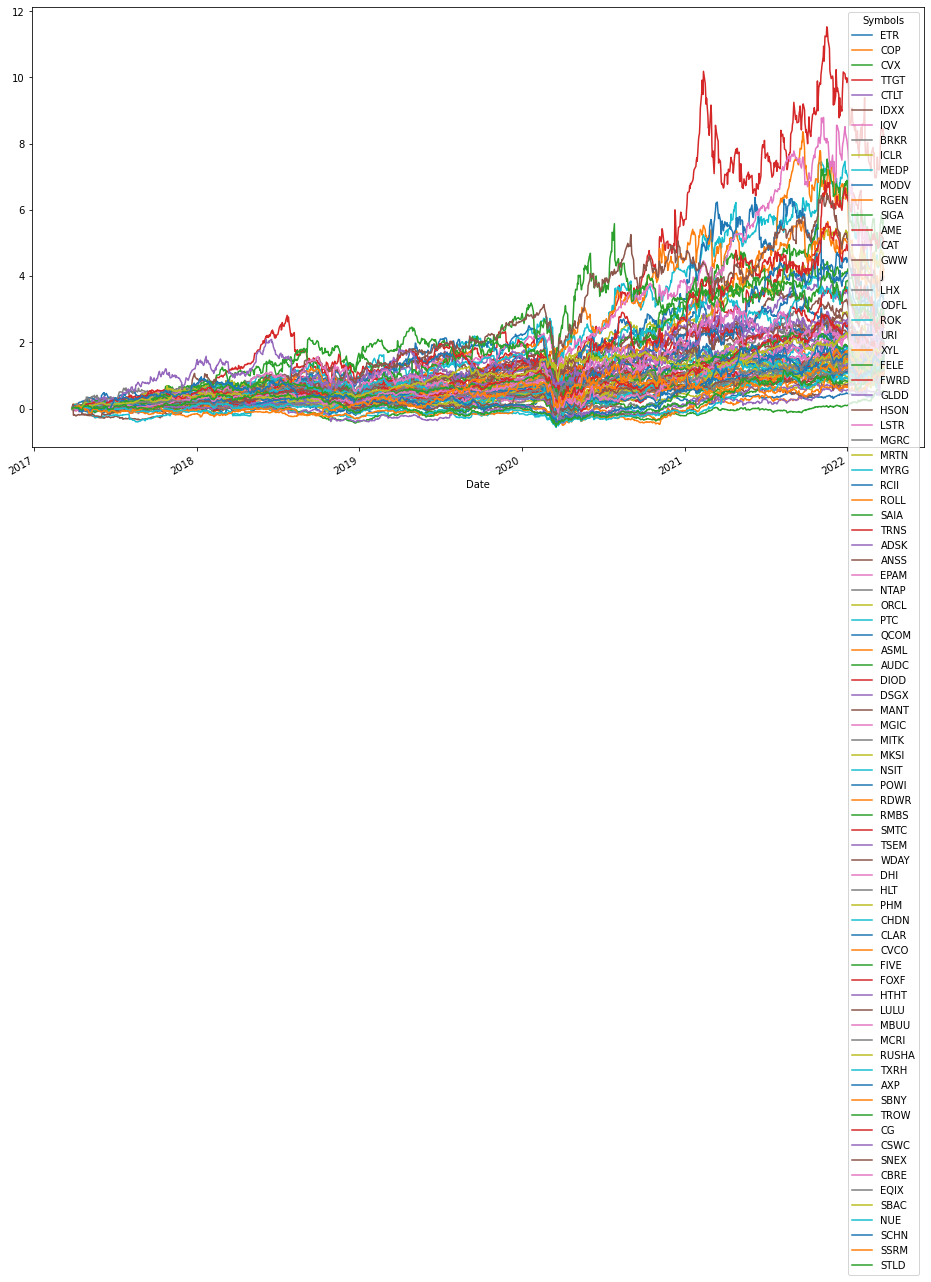

In [302]:
return_series_close.plot(figsize=(16,9))

In [303]:
return_series_close.tail(1)

Symbols,ETR,COP,CVX,TTGT,CTLT,IDXX,IQV,BRKR,ICLR,MEDP,...,CG,CSWC,SNEX,CBRE,EQIX,SBAC,NUE,SCHN,SSRM,STLD
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,0.467648,1.370522,0.539957,8.29025,2.849804,2.51496,1.880113,1.838292,2.010134,4.964697,...,1.977636,0.424691,1.133573,1.619546,0.833673,1.750951,1.568943,1.825823,1.089438,1.616111


In [327]:
correlation = return_series_close.corr()
# # correlation
# fig, ax = plt.subplots(figsize=(16,10))
# sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [328]:
correlation = correlation[correlation < 0.2]
correlation.dropna(thresh=1, inplace=True, axis=1)
correlation.dropna(thresh=1, inplace=True, axis=0)

In [329]:
correlation

Symbols,ETR,COP,CVX,TTGT,CTLT,IDXX,IQV,BRKR,ICLR,MEDP,...,CG,CSWC,SNEX,CBRE,EQIX,SBAC,NUE,SCHN,SSRM,STLD
Symbols,,,,,,,,,,,,,,,,,,,,,
ETR,NaN,0.084540,-0.089183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107900,NaN,0.072002
COP,0.084540,NaN,NaN,NaN,0.061987,0.161699,NaN,NaN,NaN,0.168050,...,NaN,NaN,NaN,NaN,-0.138285,-0.007236,NaN,NaN,-0.135277,NaN
CVX,-0.089183,NaN,NaN,-0.107499,-0.283354,-0.203590,-0.046691,-0.038216,-0.111237,-0.208247,...,0.018695,NaN,-0.03306,0.127585,-0.442510,-0.331754,NaN,NaN,-0.374833,NaN
TTGT,NaN,NaN,-0.107499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTLT,NaN,0.061987,-0.283354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBAC,NaN,-0.007236,-0.331754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165512,NaN
SCHN,0.107900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104987,NaN


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

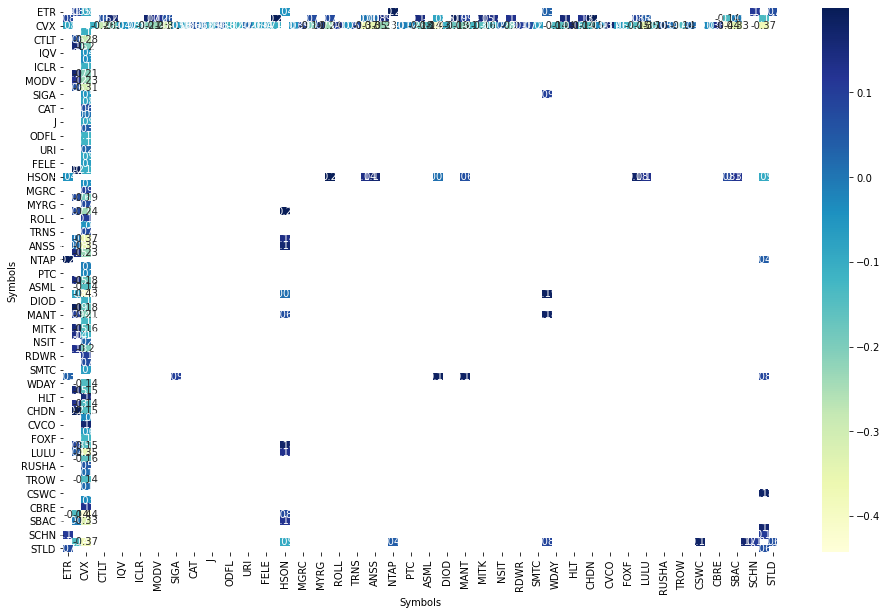

In [307]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(correlation, annot = True, ax = ax, cmap="YlGnBu")

In [330]:
len(correlation)

79

In [331]:
all_stocks = []
for each in correlation:
    all_stocks.append(each)

In [332]:
len(all_stocks)

79

In [333]:
indexes = []
for i in range(len(final_df_balanced)):
    each = final_df_balanced.iloc[i]
    ticker = each["ticker"]
    if ticker in all_stocks:
        indexes.append(i)

In [334]:
final_balanced_df = final_df_balanced.iloc[indexes]
final_balanced_df

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,ESG_risk,capm_expected_return,AHV_5y,annu_return_5y,sharpe
78,ETR,Entergy Corporation,Utilities,Increase,Above Fair Price,UnderValued,Not Sustainable,105.055,0.092009,2.111406e+10,...,6.179,0.0600,16.570189,17.001942,25.226614,30.28,0.093351,0.260092,0.118782,0.502
52,COP,ConocoPhillips,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,89.270,0.080856,1.177427e+11,...,3.687,-0.0180,11.444871,24.212095,10.774530,34.87,0.216126,0.420681,0.148794,0.639
60,CVX,Chevron Corporation,Energy,Increase,Above Fair Price,UnderValued,Not Sustainable,134.370,0.064948,2.590237e+11,...,5.173,-0.0490,14.129336,25.975256,12.151123,43.22,0.173580,0.334478,0.084378,0.502
893,TTGT,"TechTarget, Inc.",Communication Services,Increase,Below Fair Price,OverValued,No Data,73.200,0.263308,2.109602e+09,...,0.694,0.3883,28.262548,105.475500,199.319788,999.00,0.127388,0.455710,0.540216,1.159
56,CTLT,"Catalent, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,No Data,97.610,0.171804,1.670966e+10,...,3.177,0.1617,23.240477,30.723953,53.460086,999.00,0.182089,0.359504,0.285814,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,SBAC,SBA Communications Corporation,Real Estate,Increase,Below Fair Price,OverValued,Sustainable,297.160,0.204253,3.232536e+10,...,2.606,1.8932,74.663315,114.029170,599909.754404,14.52,0.056883,0.267604,0.237268,0.822
157,NUE,Nucor Corporation,Basic Materials,Increase,Below Fair Price,UnderValued,Not Sustainable,122.640,0.142526,3.505039e+10,...,16.577,0.3499,7.334929,7.398202,259.439419,36.58,0.194245,0.360322,0.193174,0.724
809,SCHN,"Schnitzer Steel Industries, Inc",Basic Materials,Increase,Above Fair Price,UnderValued,No Data,41.580,0.019844,1.156909e+09,...,5.657,0.1000,5.766991,7.350186,13.935037,999.00,0.203970,0.472387,0.156052,0.693
852,SSRM,SSR Mining Inc.,Basic Materials,Increase,Above Fair Price,UnderValued,No Data,19.525,0.006112,4.135610e+09,...,1.128,-0.2683,12.678572,17.309397,0.166831,999.00,0.145622,0.466643,0.122974,0.509


In [335]:
final_balanced_df.to_csv("selected_stocks_balanced_v3.csv")